In [58]:
import matplotlib
#matplotlib.use('Agg')
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter

# Para manejar los archivos y automatizar la lectura en directorios
import csv
import os
# Fontsize
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Nombres de archivo, paths y definiciones
La informacion de redshift solo se encuentra en los halos lvl3 dado que se necesita mucha resolucion a alto redshift donde el halo es mas pequeno

In [59]:
# SOME DEFINITIONS
# The directory where information lies
direc = '../Data/Halo_Detail/'
# Level of the simulation 
lvl = 'level3_'
# If DM or MHD
sim_det = 'DM'

# la carpeta completa
lvl = lvl+sim_det

# Halos de la simulacion de nivel 3
halos = [6,26,21,23,24,27]

# Data format
El formato de la data se explica con la siguiente funcion

In [60]:
# En esta funcion se obtiene la data de un halo dadas sus especificaciones
# Parametros necesarios:
# directorio - el directorio donde se encuentran los datos
# level      - el nivel de la simulacion incluyendo si es DM o MHD
# halo       - el numero del halo
# Retorna:
# Una lista de arrays con el radial profile y su respectivo redshift
def get_data(directorio,level,halo):
    # El path en donde esta la informacion
    path = directorio+level+'/halo_'+str(halo)
    
    # List of directories
    # Cada radial profile esta en una carpeta diferente para redshift diferentes
    # Se obtienen las carpetas de los redshifts
    listdir = next(os.walk(path))[1]
    if 'rand_sample' in listdir:
        listdir.remove('rand_sample')
    # Retorna el numero del snapshot para ordenar
    def getkey(l):
        return int(l.split("_")[1])
    # ordena por numero de snapshot
    listdir.sort(key=getkey)
    
    # La lista en la que se van a guardar los radial profiles
    list_radial_profiles = []
    # Obtiene la informacion para cada subdirectorio
    for sub_dir in listdir:
        # Loads information dictionary
        # Esta informacion es cargada en info.npy como un objeto de numpy
        # y se carga de la siguiente manera
        info = np.load(path+"/"+sub_dir+"/info.npy",encoding = 'latin1')
        # Por ahora solo queremos el redshift\
        # Pero contiene informacion del scale factor y los radios R_DM,R_BH y R_Star
        redshift = info.item().get('Redshift')
        #print("Redshift: "+str(redshift))
        
        if redshift > 2:        
            # Semiaxes
            # Se cargan los semiejes en formato a,b,c 
            # el radio de sampleo es la media geometrica de abc
            arr = np.loadtxt(path+"/"+sub_dir+"/s"+sub_dir.split("_")[1]+".txt", delimiter = ",")

            # anade la informacion
            list_radial_profiles.append([redshift,arr])
    
    return list_radial_profiles
    

# Usage
A continuacion un ejemplo de como se usa la funcion definida anteriormente, en este caso para el ejercicio de triaxialidad

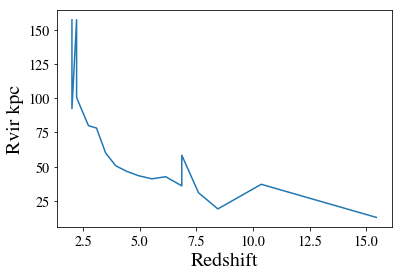

In [61]:
# The geometric mean
from scipy.stats.mstats import gmean

# El primer Halo
specific_halo = halos[0]
# Tomamos los datos
data_halo = get_data(direc,lvl,specific_halo)
# Vamos a plotear el radio virial (ultimo radio sampleado), en funcion del redshift
redshift = []
vir_rad = []
for red,axes in data_halo:
    redshift.append(red)
    rvir = 0
    # Cuidado con la dimension de los semiejes
    # a veces se tiene baja resolucion y es solo un datao para ejes
    if axes.ndim == 1:
        rvir = gmean(axes)
    else:
        rvir = gmean(axes[-1])
    vir_rad.append(rvir)
    
redshift = np.array(redshift)  
vir_rad = np.array(vir_rad)
indices = np.argsort(redshift)
plt.plot(redshift[indices],vir_rad[indices])
plt.xlabel('Redshift',fontsize =20)
plt.ylabel('Rvir kpc',fontsize =20)
plt.show()

In [62]:
data_halo

[[15.45026662890206, array([ 12.70819735,  12.70819735,  12.70819735])],
 [10.367443572408746, array([[  4.5908361 ,   3.51306611,   1.96094798],
         [  5.10326346,   3.79555221,   2.12795115],
         [  5.88766241,   4.05824191,   2.2782562 ],
         [  6.64711545,   4.28992662,   2.47792496],
         [  7.41143213,   4.58251437,   2.77786061],
         [  8.10616224,   4.86096648,   3.10852521],
         [  8.84168064,   5.23792059,   3.55456146],
         [  9.61026184,   5.64148404,   4.10980609],
         [ 10.19866925,   6.06368813,   4.65391172],
         [ 11.02188105,   6.51126055,   5.19658787],
         [ 11.93381307,   7.13170621,   5.75954113],
         [ 12.91784899,   7.80534615,   6.39573749],
         [ 14.07265751,   8.57948729,   7.13439602],
         [ 15.43709453,   9.42645327,   7.86768713],
         [ 16.92541851,  10.33185838,   8.64260996],
         [ 18.64851299,  11.23980652,   9.51049165],
         [ 20.55704761,  12.18305302,  10.49761922],
      